### Battery Classification Background: 

This chemistry classification project deals with an extensive amount of data (>100GB), as such, only a brief selection of figures are presented in this notebook for data exploration and visual demonstration. If interested, we encourage you to explore the datasets further. We'll get's get started with a background on the data. 

#### 1. Data Provenance
All battery cycling records used in this study are derived from academic research projects. Most records were collected from [BatteryArchive](https://www.batteryarchive.org/), a public repository built to encourage collaboration among battery researchers. Some were retrieved directly from the academic institution that initiated the experiment. In each case, these records are the result of significant financial and temporal investment, and we extend gratitude for their generous contribution to battery research. Citations for our data sources are provided in the table below.

| Chemistry | Num Records | Researcher(s)             | Citation | Dataset Location                              |
|-----------|-------------|----------------------------|----------|------------------------------------------------|
| LCO-Gr    | 45          | Diao, Saxeno, & Pecht      |  Accelerated Cycle Life Testing and Capacity Degradation Modeling of LiCoO2-graphite Cells , Weiping Diao, Saurabh Saxena, and Michael Pecht, Journal of Power Sources, Vol. 435, September 2019, DOI: 10.1016/j.jpowsour.2019.226830.     | https://calce.umd.edu/battery-research-efforts |
| NMC-Gr    | 2          | Bouzi, Mostafa & Ettalabi, Naoufl      |  Online parameter estimation of a lithium-ion battery based on sunflower optimization algorithm. Bulletin of Electrical Engineering and Informatics. 10. 1505-1513. 10.11591/eei.v10i3.2637. | https://calce.umd.edu/battery-research-efforts |
| NMC-Gr    | 256          | Thelen, Adam; Li, Tingkai; Liu, Jinqiang; Tischer, Chad; Hu, Chao      | ISU-ILCC Battery Aging Dataset. Iowa State University. Dataset. https://doi.org/10.25380/iastate.22582234.v2 | https://iastate.figshare.com/articles/dataset/_b_ISU-ILCC_Battery_Aging_Dataset_b_/22582234 |
| LFP-Gr    | 124          | William Chueh      | Data-Driven Prediction for Battery. StorageX, Stanford University. Accessed at: https://storagex.stanford.edu/publications/accelerated-validation-new-materials-and-technologies/data-driven-prediction-battery | https://www.kaggle.com/datasets/itshpark/data-driven-prediction-of-battery-cycle |
| LCO-Gr    | 8          | Howey, D., and C. Birkl.      | Oxford Battery Degradation Dataset 1. University of Oxford | https://ora.ox.ac.uk/objects/uuid:03ba4b01-cfed-46d3-9b1a-7d4a7bdf6fac |
| NCA,NMC,LFP    | 18          | Catenaro, Edoardo; Onori, Simona     | Experimental data of three lithium-ion batteries under galvanostatic discharge tests at different C-rates and operating temperatures, Politecnico di Milano, V2, doi: 10.17632/kxsbr4x3j2.2 | https://data.mendeley.com/datasets/kxsbr4x3j2/2 |
| NCA,NMC,LFP    | 8          | Heydarzadeh, M., & Toivola, T.      | NMC, NCA, and LFP Cells Degradation Under Randomized Current Profiles (Version 1). Turku University of Applied Sciences. https://doi.org/10.23729/b07462e8-9e31-428c-bdd5-deb1890c608b | https://etsin.fairdata.fi/dataset/f60a7388-99b6-4637-96d5-8610a7f71612/data |

#### 2. What are Cycling Records? 
*Cycling* is the process of charging/discharging a battery repeatedly in an effort to comprehend battery characteristics as they age. Our dataset focuses specifically on lithium-ion batteries, which are often cycled hundreds or thousands of times over the course of their operating lives. Typical cycling records will contain information like voltage, current, equivalent full cycles, and temperature over a period of time. Some datasets include additional characteristics such as the estimated state of charge (SOC), and the differential voltage as a function of SOC perturbation.  


Figure 1: Example of Battery Cycling Data (Voltage vs. time)


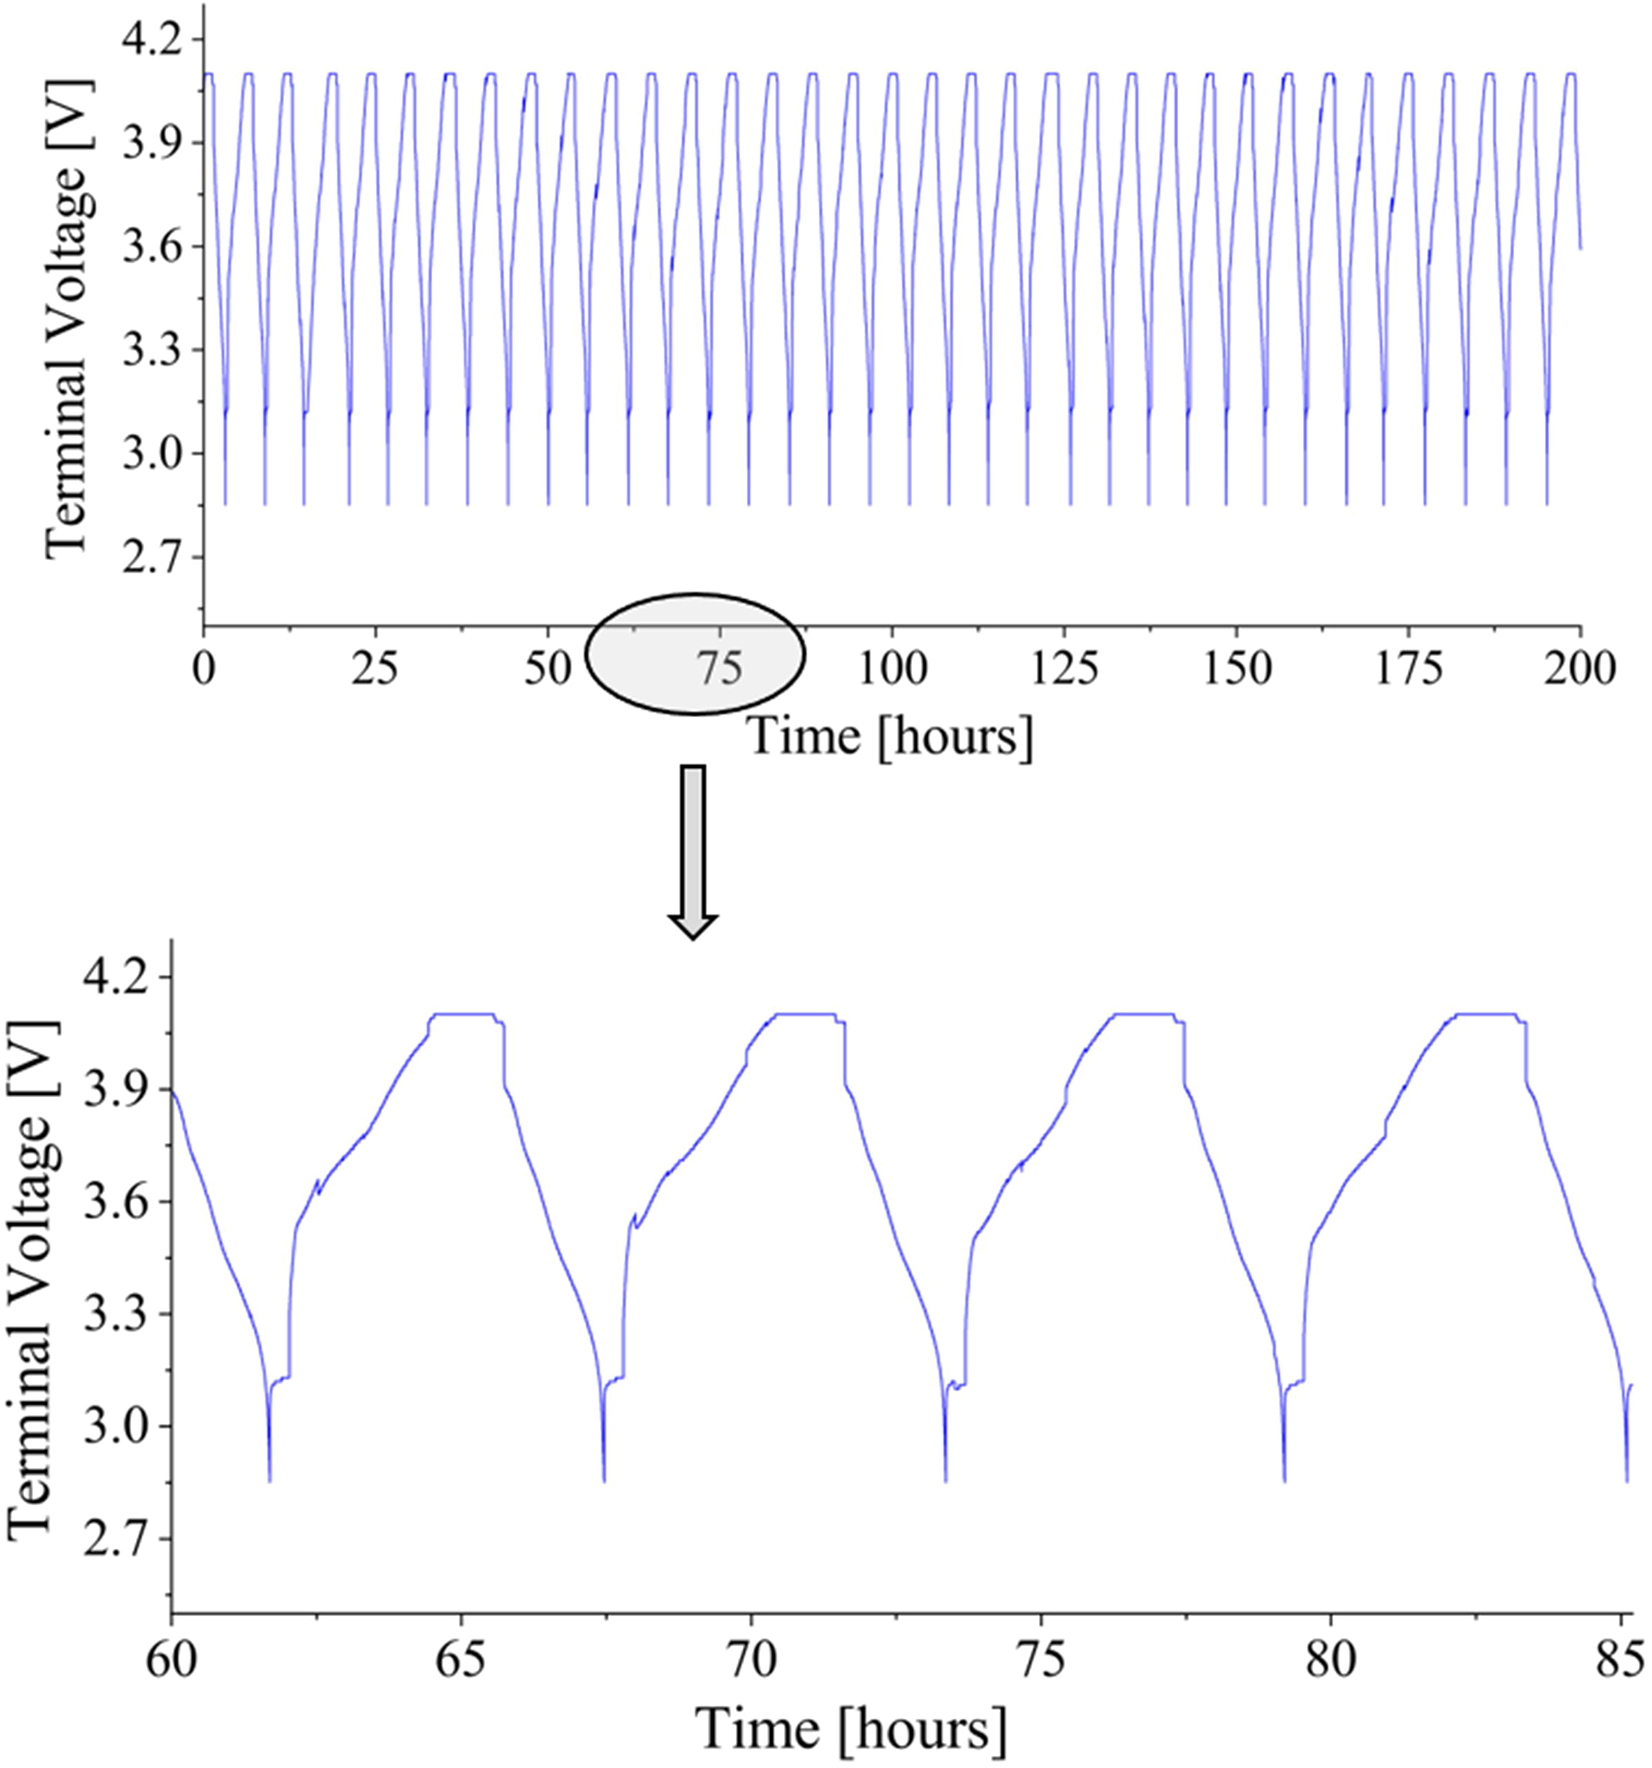

Attribution: Mulpuri et al, 'Protocol for conducting advanced cyclic tests in lithium-ion batteries to estimate capacity fade', Battery Energy 2023
DOI: https://doi.org/10.1002/bte2.20210017


In [ ]:
import requests
from IPython.display import Image, display

# Convert Google Drive "view" link to direct-download link
file_id = "12qX78lANfxtci0eu75foK4Iso-mm1HcG"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Fetch and display the image
print("Figure 1: Example of Battery Cycling Data (Voltage vs. time)")
response = requests.get(url)
response.raise_for_status()  # safer: throws error if download fails

display(Image(data=response.content, width=400, height=400))

# Attribution info
print("Attribution: Mulpuri et al, 'Protocol for conducting advanced cyclic tests in lithium-ion batteries to estimate capacity fade', Battery Energy 2023")
print("DOI: https://doi.org/10.1002/bte2.20210017")





#### 3. Important Technical Nuances: 
A few conceptual items are useful to know before modeling for chemistry classification: 
1. Battery voltage has distinct variation between charge and discharge. Even at extremely low current profiles, where interal resistances are negligible, there is a gap in voltage for the same state of lithiation based on the battery's "history". This is known as hysteresis. Due to hysteresis, the voltage will be different for a battery if it's being charged or discharged, even if all else is equal. 
2. Higher temperatures improves the batteries ability to shuttle lithium between the positive and negative electrodes. Thus, voltage will be lower at higher temperatures when the same current is applied.
3. As a battery ages, the voltage profile as a function of SOC will shift over time.
4. Battery chemistries generally have specific voltage operating windows that should not be exceeded to prevent accelerated degradation of the battery. However, all chemistries considered in this project would be safe to cycle between 3.0 and 3.6 volts. 

Each of these factors, complicate the ability to classify battery chemistry.    

*Note: In practical application at a utility plant or in a storage facility where the battery testing is applied, it reasonable to expect the temperature to be reasonably controlled to near-room temperature conditions*

**An Example of Hysteresis affecting Voltage Differences:**

Figure 2: Example of Voltage Hysteresis in a Lithium-Ion Battery during Charge and Discharge Cycles


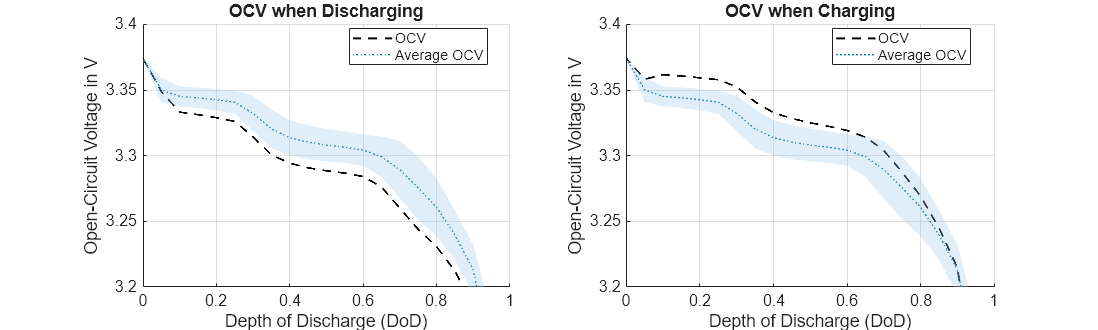

Attribution: Van der Ven et al, “Hysteresis in Electrochemical Systems”, Battery Energy 2022
DOI: https://doi.org/10.1002/bte2.20210017


In [12]:
url = 'https://drive.google.com/uc?export=view&id=1_gqUI5R5J9jh-CsSo3tpsnqKGhDz1jy6'

# Fetch and display the image
print("Figure 2: Example of Voltage Hysteresis in a Lithium-Ion Battery during Charge and Discharge Cycles")
image_data = requests.get(url).content
display(Image(data=image_data, width=800, height=800))

# Attribution info
print("Attribution: Van der Ven et al, “Hysteresis in Electrochemical Systems”, Battery Energy 2022")
print("DOI: https://doi.org/10.1002/bte2.20210017")

**An Example of Temperature Affecting Battery Voltage:**

Figure 3: Example of Battery Voltage Sensitivity to Temperature


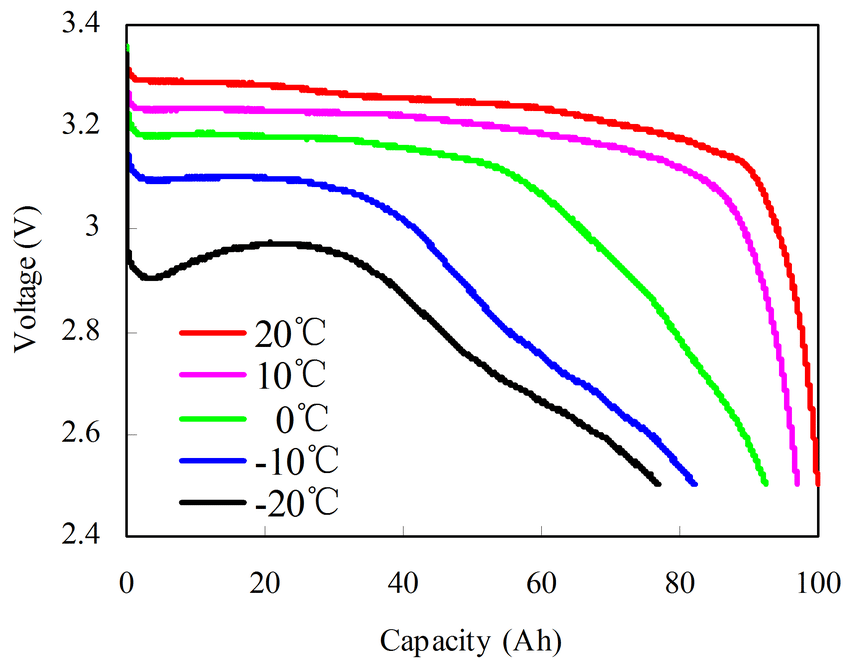

Attribution: Feng et al., 'A Combined State of Charge Estimation Method for Lithium-Ion Batteries Used in a Wide Ambient Temperature Range', Energies 2014
DOI: https://doi.org/10.3390/en7010001


In [18]:
# Convert Google Drive "view" link to direct-download link
file_id = "16CnPOcx-2DQkyuxJZM0yxzC-W9-DqHAe"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Fetch and display the image
print("Figure 3: Example of Battery Voltage Sensitivity to Temperature")
response = requests.get(url)
response.raise_for_status()  # safer: throws error if download fails

display(Image(data=response.content, width=400, height=400))

# Attribution info
print("Attribution: Feng et al., 'A Combined State of Charge Estimation Method for Lithium-Ion Batteries Used in a Wide Ambient Temperature Range', Energies 2014")
print("DOI: https://doi.org/10.3390/en7010001")


**An example of voltage profiles shifting over battery age:** 

Figure 4: Example of Battery Voltage Shift Over Life


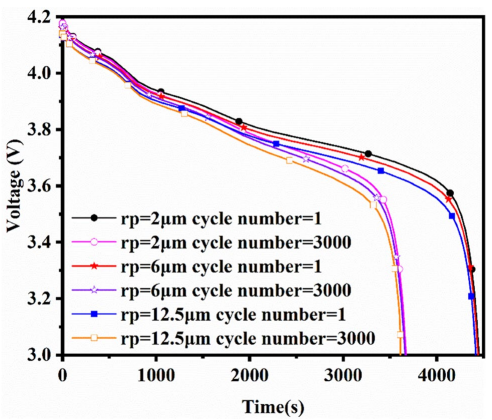

Attribution: Su et al., 'Simulation exploration on capacity fade and aging prediction of M1254S2 button‑type lithium‑ion battery', Ionic 2024
DOI: https://doi.org/10.1002/bte2.20210017


In [16]:
# Convert Google Drive "view" link to direct-download link
file_id = "1r7IhPSk2MronNMA5LyAPafzOhfJ5dxph"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Fetch and display the image
print("Figure 4: Example of Battery Voltage Shift Over Life")
response = requests.get(url)
response.raise_for_status()  # safer: throws error if download fails

display(Image(data=response.content, width=400, height=400))

# Attribution info
print("Attribution: Su et al., 'Simulation exploration on capacity fade and aging prediction of M1254S2 button‑type lithium‑ion battery', Ionic 2024")
print("DOI: https://doi.org/10.1002/bte2.20210017")

**An Example of different voltage profiles by chemistry:**

Figure 5: Example of Battery Voltage Differences by Chemistry


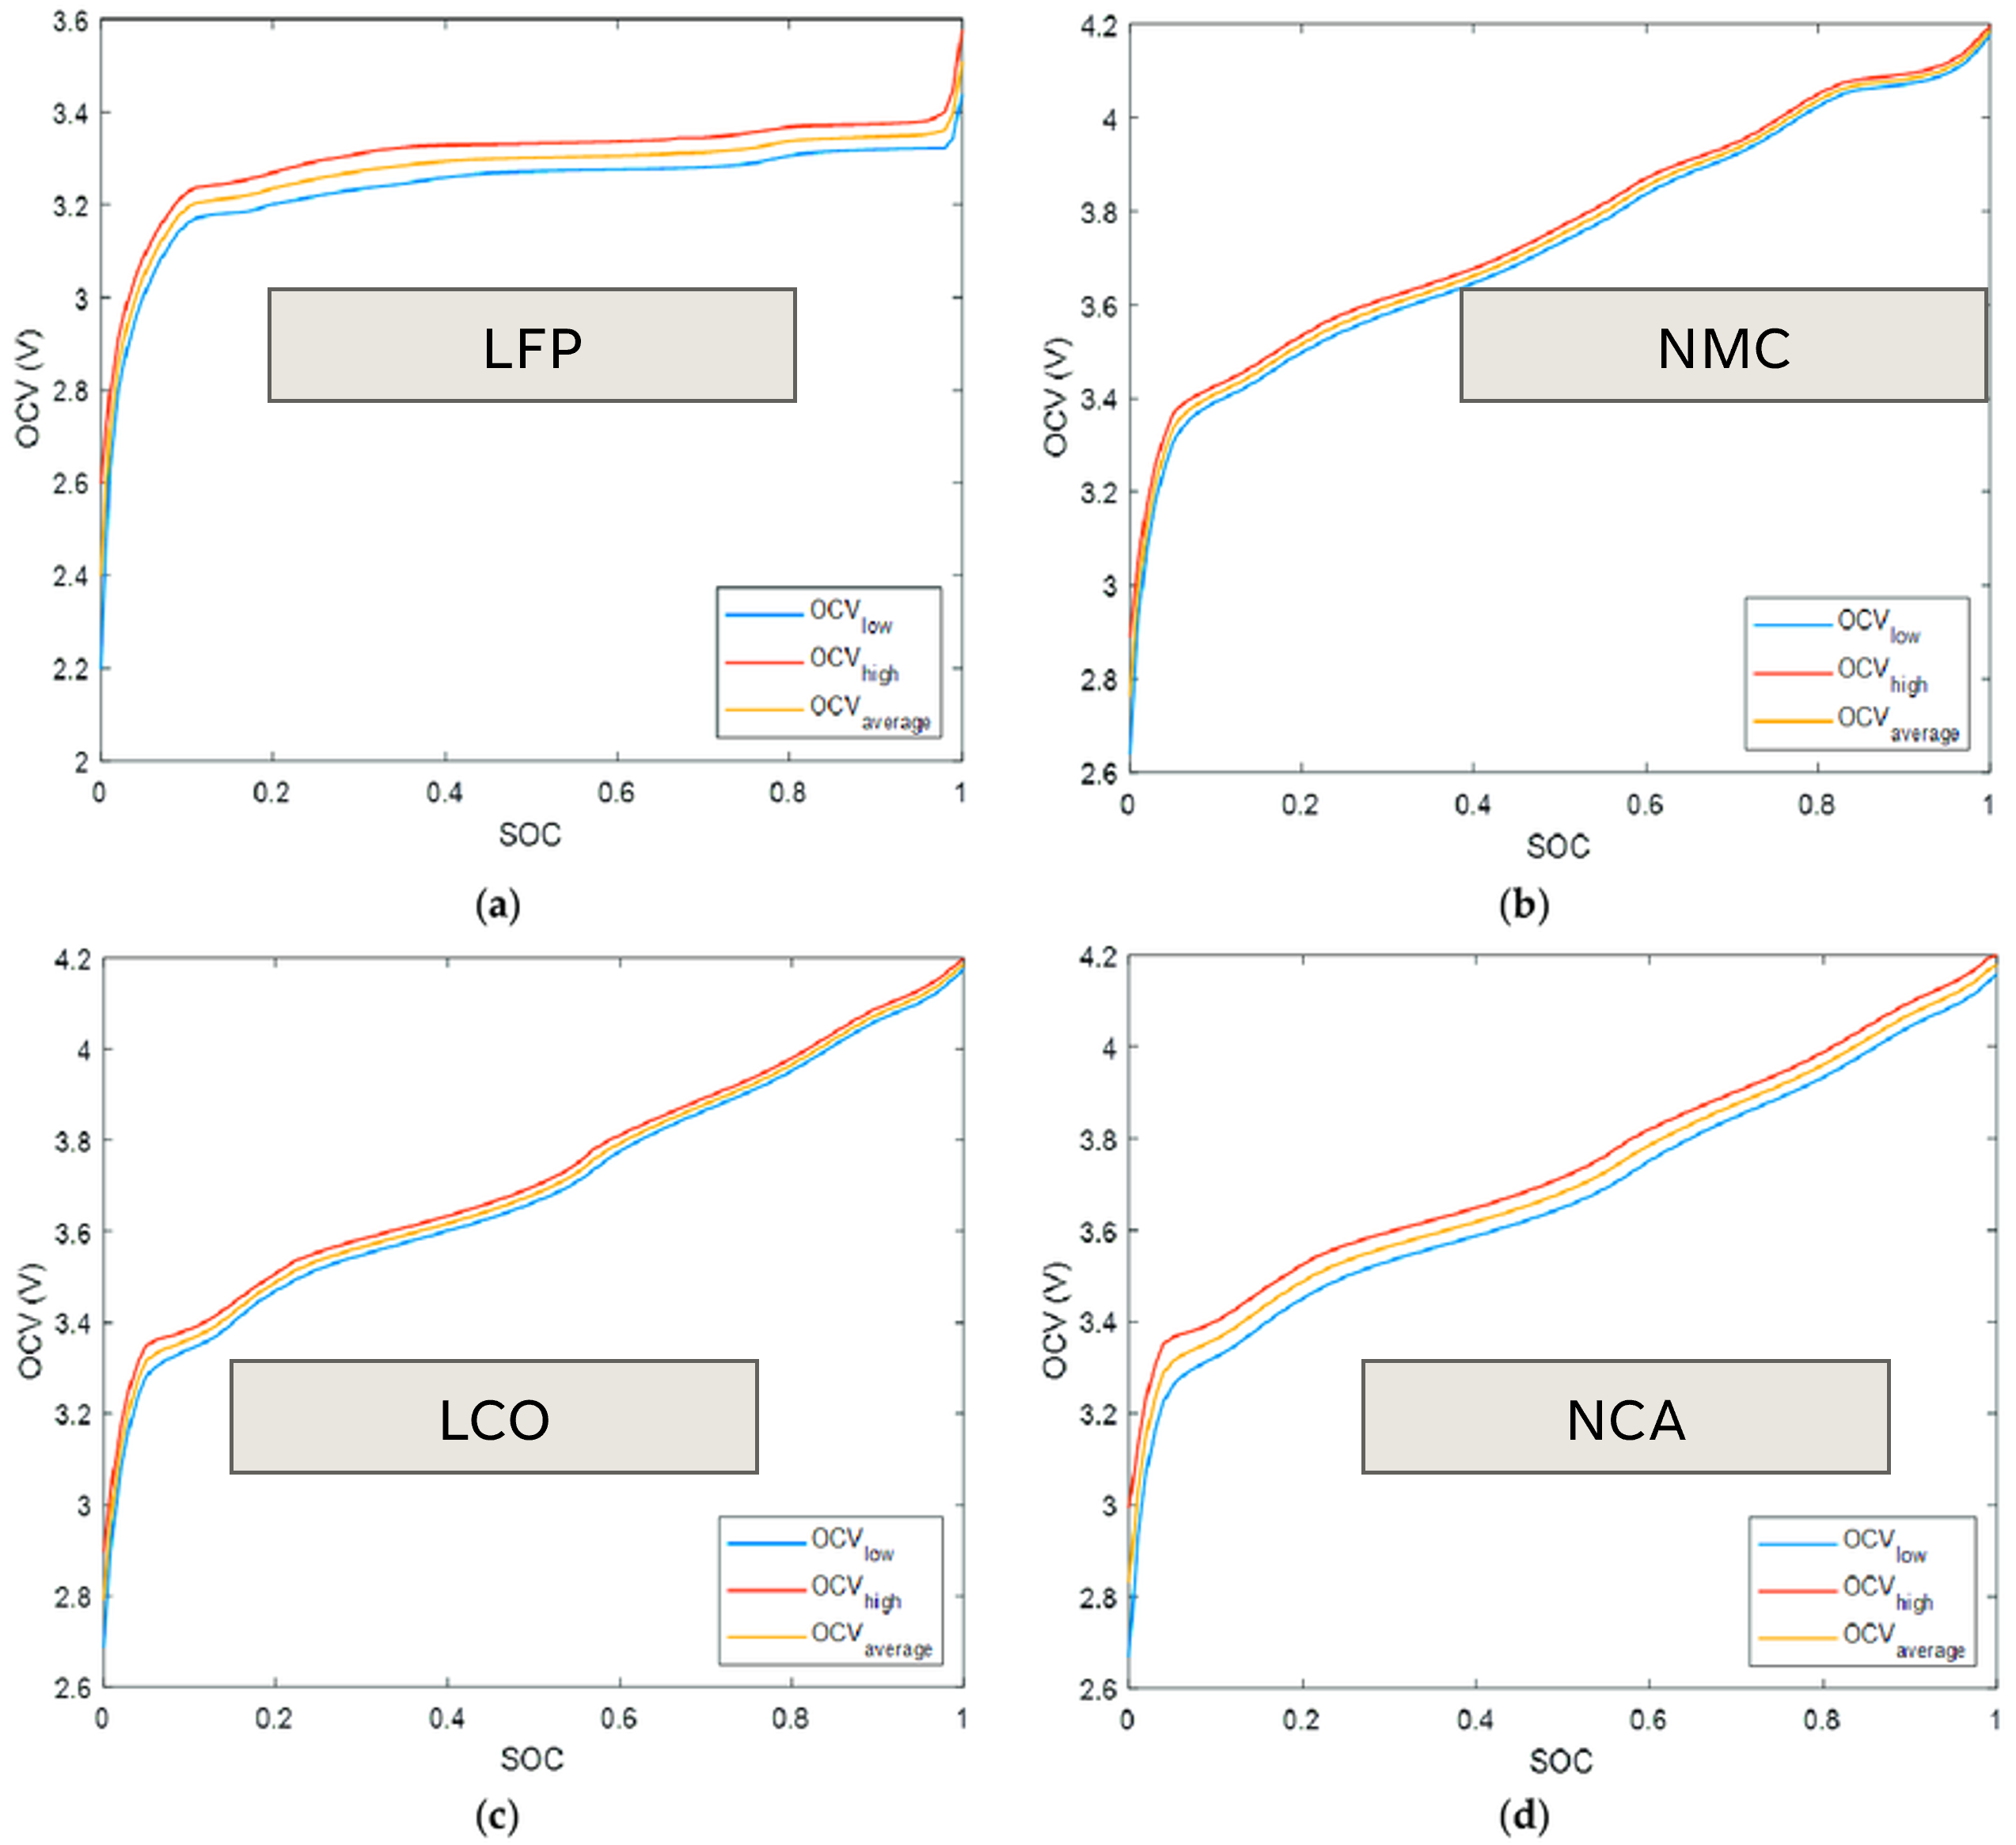

Attribution: Tran et al, Comparative Study of Equivalent Circuit Models Performance in Four Common Lithium-Ion Batteries: LFP, NMC, LMO, NCA, Batteries 2021
DOI: https://doi.org/10.3390/batteries7030051


In [14]:
print("Figure 5: Example of Battery Voltage Differences by Chemistry")
url = 'https://drive.google.com/uc?export=view&id=1Z3cBoZmfh-rB_sRv6p10rhPI8V3PY9NY'
image_data = requests.get(url).content
display(Image(data=image_data, width=650, height=650))
print("Attribution: Tran et al, Comparative Study of Equivalent Circuit Models Performance in Four Common Lithium-Ion Batteries: LFP, NMC, LMO, NCA, Batteries 2021")
print("DOI: https://doi.org/10.3390/batteries7030051")

### 4. Summary:

In this notebook we've presented the type of battery data we intend to use for chemistry classification. We've discussed the main features (voltage, SOC, temperature, current, and cycle count) which influence a battery's voltage response, and we've reviewed graphical examples how these features typically affect a lithium-ion battery. 

In the next notebook, we'll conduct exploratory data analysis to highlight the key nuances between our different datasources. 